In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats
import math
from numpy import genfromtxt
import png
from numpy import genfromtxt
from PIL import Image    
from matplotlib.colors import ListedColormap
import scipy.linalg as la
from sklearn.decomposition import PCA
import csv


# Aesthetics
sns.set_style("whitegrid")

In [2]:
# Read in csv
calibri_df = pd.read_csv('CALIBRI.csv')
courier_df = pd.read_csv('COURIER.csv')
times_df = pd.read_csv('TIMES.csv')

#Display Dataframe
calibri_df.head()

,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,CALIBRI,CALIBRI LIGHT,65059,0.4,0,0.0,41,20,7,27,...,255,255,255,86,1,1,1,1,1,1
1,CALIBRI,CALIBRI LIGHT,65058,0.4,0,0.0,40,0,5,20,...,1,1,1,1,1,1,1,1,255,255
2,CALIBRI,CALIBRI LIGHT,65057,0.4,0,0.0,38,20,10,29,...,1,1,1,1,1,1,1,1,97,255
3,CALIBRI,CALIBRI LIGHT,65056,0.4,0,0.0,38,0,6,20,...,1,1,1,1,1,1,1,1,1,1
4,CALIBRI,CALIBRI LIGHT,64260,0.4,0,0.0,38,22,46,46,...,145,255,45,1,1,1,1,1,189,255


# Data Cleaning and Preparation

In [3]:
dataframes = [calibri_df, courier_df, times_df]

discard = ['fontVariant', 'm_label', 'orientation', 'm_top', 'm_left', 'originalH', 'originalW', 'h', 'w']

calibri_df.drop(columns = discard, inplace = True)
courier_df.drop(columns = discard, inplace = True)
times_df.drop(columns = discard, inplace = True)

In [4]:
cl1 = calibri_df[(calibri_df["strength"] == 0.4) & (calibri_df['italic'] == 0)]
cl2 = courier_df[(courier_df['strength'] == 0.4) & (courier_df['italic'] == 0)]
cl3 = times_df[(times_df['strength'] == 0.4) & (times_df['italic'] == 0)]

In [5]:
print(len(cl1), len(cl2), len(cl3))

4768 4262 4805


In [6]:
df = pd.concat([cl1, cl2, cl3], ignore_index=True)

# Part 0

In [7]:
scaler = StandardScaler()
scaler.fit(df.iloc[:,3:])
sdf = scaler.transform(df.iloc[:,3:])

In [8]:
sdf = pd.DataFrame(sdf, columns = df.iloc[:,3:].columns)
corr_sdf = sdf.corr()

In [20]:
corr_sdf.to_csv('CORR_matrix.csv')

In [10]:
eigen_vals, eigen_vecs = la.eig(corr_sdf)

In [11]:
eigen_vals = eigen_vals.real

In [22]:
pd.DataFrame(eigen_vals).to_csv('EigenValues.csv')

In [24]:
pd.DataFrame(eigen_vecs).to_csv('EigenVectors.csv')

In [14]:
W = eigen_vecs.transpose()

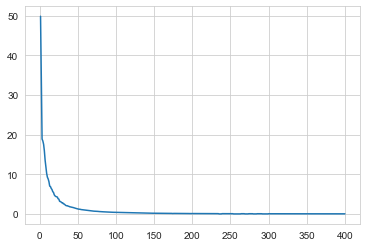

In [15]:
sns.lineplot(x = [number for number in range(1,401)], y = eigen_vals)

In [16]:
PVE_r = np.cumsum(eigen_vals / len(W))

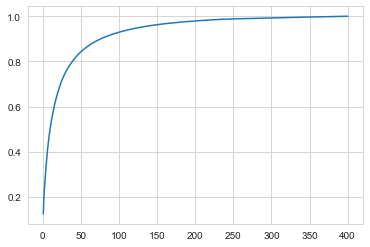

In [17]:
sns.lineplot(x = [number for number in range(1,401)], y = PVE_r)

In [18]:
pve_df = pd.DataFrame({'PVE_r':PVE_r, 
                       'r':[i for i in range(1,401)]})
pve_df[pve_df['PVE_r']<=.95].tail()

,PVE_r,r
121,0.947003,122
122,0.947675,123
123,0.948343,124
124,0.948973,125
125,0.949625,126


In [50]:
W.shape

(400, 400)

In [51]:
sdf.shape

(13835, 400)

In [52]:
sdf.iloc[0:1,:].shape

(1, 400)

In [53]:
sdf = np.transpose(np.matmul(W, np.transpose(sdf)))

In [54]:
sdf = sdf.iloc[:, :126]

In [55]:
sdf = sdf.join(df.iloc[:,0])

# Part 1

In [56]:
cl1_train, cl1_test, font1_train, font1_test = train_test_split(sdf[sdf['font'] == 'CALIBRI'].iloc[:,0:126], sdf[sdf['font'] == 'CALIBRI'].iloc[:,126], test_size=0.2, random_state=0)
cl2_train, cl2_test, font2_train, font2_test = train_test_split(sdf[sdf['font'] == 'COURIER'].iloc[:,0:126], sdf[sdf['font'] == 'COURIER'].iloc[:,126], test_size=0.2, random_state=0)
cl3_train, cl3_test, font3_train, font3_test = train_test_split(sdf[sdf['font'] == 'TIMES'].iloc[:,0:126], sdf[sdf['font'] == 'TIMES'].iloc[:,126], test_size=0.2, random_state=0)

In [57]:
X_train = pd.concat([cl1_train, cl2_train, cl3_train])
X_test = pd.concat([cl1_test, cl2_test, cl3_test])
y_train = pd.concat([font1_train, font2_train, font3_train])
y_test = pd.concat([font1_test, font2_test, font3_test])

In [58]:
sdf

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,...,r5c17,r5c18,r5c19,r6c0,r6c1,r6c2,r6c3,r6c4,r6c5,font
0,4.496145,2.204354,2.382411,-4.356828,3.148915,9.391070,-3.614336,0.290407,12.250893,-1.054439,...,-0.227370,0.295713,-0.755164,1.185578,0.039785,-0.641493,-0.263537,-0.240845,-0.176611,CALIBRI
1,11.814995,0.157345,5.734803,-2.455636,3.806352,5.383348,6.385354,2.931689,-12.980638,1.755131,...,0.249995,-0.165185,1.359381,1.028360,-1.002582,0.567039,0.258126,0.952087,-0.298464,CALIBRI
2,-2.279028,-3.504350,2.290238,-1.270442,-0.411100,-0.802221,9.010800,2.928040,-10.889454,4.112699,...,-0.733023,-0.727596,0.068964,-1.146708,-1.335569,0.203427,0.727765,-0.170710,-0.687880,CALIBRI
3,7.155193,-3.589501,6.766855,-3.783634,2.038043,2.362414,3.648373,1.371327,2.482270,-14.213287,...,0.447927,0.019701,0.022598,0.460415,0.347714,0.379307,0.544392,-0.303459,-0.204736,CALIBRI
4,-2.899628,0.950101,-0.785992,-4.066971,4.245324,-1.472368,3.041673,0.732117,-0.940628,-2.090693,...,-0.308327,0.370677,0.465656,0.486254,-0.197240,-0.163588,0.489138,-0.257204,-0.642813,CALIBRI
5,-3.438042,1.286744,0.279924,-2.482238,4.212400,-0.212669,2.273688,0.142634,-1.785805,-0.123774,...,-0.228416,0.686456,0.906730,0.568398,-0.339248,0.198447,0.656809,0.700290,-0.968228,CALIBRI
6,-0.642947,5.091448,2.350694,-3.196879,-3.494798,-4.668392,-0.302096,11.345334,2.500566,-2.931639,...,-0.006285,-0.103498,-0.599564,0.949564,-0.190176,0.013403,-0.159030,0.852525,-0.121823,CALIBRI
7,-1.711256,4.659658,4.836912,-0.367428,-3.268179,-2.938148,-0.265892,9.616572,0.749460,0.003066,...,-0.077086,0.092503,-0.215748,0.679021,-0.666724,0.229272,-0.156896,0.831359,-0.271521,CALIBRI
8,-2.477824,-0.045734,4.411322,-0.634347,-5.407240,2.321675,1.186979,-6.222474,-0.998087,0.328109,...,-0.870469,0.682882,-0.512099,0.753836,-0.815878,0.209600,0.588267,-0.625773,-0.341983,CALIBRI
9,-1.356194,10.666059,-4.911158,-0.558551,1.679382,-3.691014,-1.431170,-0.727843,2.178559,2.072810,...,-0.690859,-0.258845,0.016104,0.182097,0.012476,0.103705,-0.064009,0.175159,0.813853,CALIBRI


In [59]:
X_train.head()

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,...,r5c16,r5c17,r5c18,r5c19,r6c0,r6c1,r6c2,r6c3,r6c4,r6c5
2866,-2.371658,-9.952650,-5.471384,-5.793714,0.472672,-3.522447,-1.843494,-1.107649,-0.363445,3.309198,...,1.096636,-0.806340,-0.195823,-0.559415,-0.116890,-0.320649,-0.651047,0.162791,-0.340773,0.839547
1790,-5.562016,-2.369939,-1.918146,-7.103943,-0.725340,0.469430,-2.506543,-4.829217,-3.009225,1.544781,...,0.185353,0.001634,0.230910,-0.820458,0.055860,1.201431,0.720646,-0.426048,0.903812,-0.819757
2217,-4.306552,4.037124,3.818085,4.446535,4.692323,1.711367,0.255168,-1.208295,1.360608,-2.983434,...,-0.005603,-0.338341,0.372672,-0.790490,-0.165461,0.584482,-0.333998,-0.888526,0.380310,0.452142
2740,-1.337903,-0.395418,2.618807,2.443439,11.721263,1.678446,3.551032,2.351205,-1.506930,-1.219510,...,-0.348942,-0.378801,-0.137736,-0.621047,-0.496642,-0.305176,0.104035,-0.662686,0.539621,0.281372
4289,5.773341,4.298826,1.614213,4.816653,-3.976771,-4.493491,2.838463,0.053584,-4.682239,-4.664609,...,0.305259,-0.086657,-0.004905,-0.621752,-1.090193,-0.352617,0.297970,1.107789,0.758589,0.046651


In [60]:
k = 7

In [61]:
classifier = KNeighborsClassifier(n_neighbors=k)

In [62]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [63]:
y_pred = classifier.predict(X_train)

In [64]:
y_pred_test = classifier.predict(X_test)

In [65]:
print(accuracy_score(y_true = y_train, y_pred = y_pred))
print(accuracy_score(y_true = y_test, y_pred = y_pred_test))

0.8594921839703623
0.807442196531792


In [74]:
k = [5, 10 , 15, 20, 30, 40, 50 , 100]
train_perf_k = []
test_perf_k = []

for i in k:
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train, y_train)
    train_perf_k.append(classifier.predict(X_train))
    test_perf_k.append(classifier.predict(X_test))
    train_perf_k2 = []

test_perf_k2 = []

for i in train_perf_k:
    train_perf_k2.append(accuracy_score(y_true = y_train, y_pred = i))
for i in test_perf_k:
    test_perf_k2.append(accuracy_score(y_true = y_test, y_pred = i))

In [75]:
train_perf_k2

[0.8809072015903135,
 0.824975151350863,
 0.8008493720068672,
 0.7795247131110509,
 0.7544049878015723,
 0.7297370561127677,
 0.7087738321134905,
 0.6605222734254992]

In [76]:
test_perf_k2

[0.8168352601156069,
 0.7817919075144508,
 0.7742052023121387,
 0.75,
 0.7377167630057804,
 0.724349710982659,
 0.7066473988439307,
 0.6629335260115607]

In [77]:
for i in range(0, len(train_perf_k2)):
    print(train_perf_k2[i] - test_perf_k2[i])

0.06407194147470663
0.043183243836412144
0.026644169694728492
0.02952471311105087
0.016688224795791906
0.005387345130108745
0.0021264332695598576
-0.002411252586061563


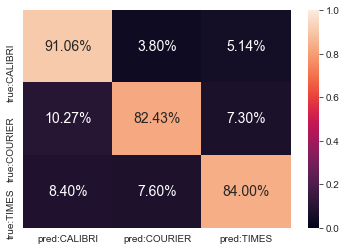

In [72]:
cmtx_a_train = pd.DataFrame(
    confusion_matrix(y_true=y_train,y_pred = train_perf_k[2], labels = ['CALIBRI', 'COURIER', 'TIMES'], normalize = 'true'),
    index=['true:CALIBRI', 'true:COURIER', 'true:TIMES'], 
    columns=['pred:CALIBRI', 'pred:COURIER', 'pred:TIMES'])

sns.heatmap(cmtx_a_train, annot=True, fmt = '.02%', annot_kws={"size": 14}, vmin = 0, vmax = 1)

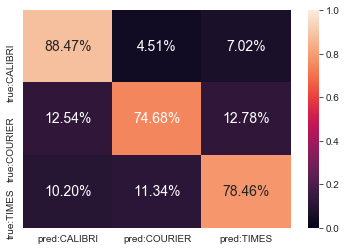

In [73]:
cmtx_a_test = pd.DataFrame(
    confusion_matrix(y_true=y_test,y_pred = y_pred_test, labels = ['CALIBRI', 'COURIER', 'TIMES'], normalize = 'true'),
    index=['true:CALIBRI', 'true:COURIER', 'true:TIMES'], 
    columns=['pred:CALIBRI', 'pred:COURIER', 'pred:TIMES'])

sns.heatmap(cmtx_a_test, annot=True, fmt = '.02%', annot_kws={"size": 14}, vmin = 0, vmax = 1)

# Check with PCA from SKLEARN

In [ ]:
scaler = StandardScaler()
scaler.fit(df.iloc[:,3:])
sdf = scaler.transform(df.iloc[:,3:])

sdf = pd.DataFrame(sdf, columns = df.iloc[:,3:].columns)

sdf = sdf.join(df.iloc[:,0])

cl1_train, cl1_test, font1_train, font1_test = train_test_split(sdf[sdf['font'] == 'CALIBRI'].iloc[:,0:400], sdf[sdf['font'] == 'CALIBRI'].iloc[:,400], test_size=0.2, random_state=0)
cl2_train, cl2_test, font2_train, font2_test = train_test_split(sdf[sdf['font'] == 'COURIER'].iloc[:,0:400], sdf[sdf['font'] == 'COURIER'].iloc[:,400], test_size=0.2, random_state=0)
cl3_train, cl3_test, font3_train, font3_test = train_test_split(sdf[sdf['font'] == 'TIMES'].iloc[:,0:400], sdf[sdf['font'] == 'TIMES'].iloc[:,400], test_size=0.2, random_state=0)

X_train = pd.concat([cl1_train, cl2_train, cl3_train])
X_test = pd.concat([cl1_test, cl2_test, cl3_test])
y_train = pd.concat([font1_train, font2_train, font3_train])
y_test = pd.concat([font1_test, font2_test, font3_test])

In [ ]:
pca = PCA(.95)
pca.fit(X_train)

In [ ]:
pca.n_components_

In [ ]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
k = 7

classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [ ]:
print(accuracy_score(y_true = y_train, y_pred = y_pred))
print(accuracy_score(y_true = y_test, y_pred = y_pred_test))

# HW Continued

In [47]:
PC123 = sdf.iloc[:,0:3]
PC123 = PC123.join(df.iloc[:,0])
PC123 = PC123.rename(columns = {'r0c0':'Y1', 'r0c1': 'Y2', 'r0c2':'Y3'})

In [48]:
PC123.head()

,Y1,Y2,Y3,font
0,4.496145,2.204354,2.382411,CALIBRI
1,11.814995,0.157345,5.734803,CALIBRI
2,-2.279028,-3.504350,2.290238,CALIBRI
3,7.155193,-3.589501,6.766855,CALIBRI
4,-2.899628,0.950101,-0.785992,CALIBRI


(-20, 20)

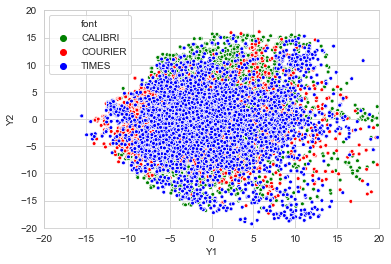

In [70]:
sns.scatterplot(x = PC123.iloc[:,0], y = PC123.iloc[:,1], hue = PC123['font'], palette = ['green', 'red', 'blue'], s = 15)
plt.ylim(-20, 20)
plt.xlim(-20, 20)

(-20, 20)

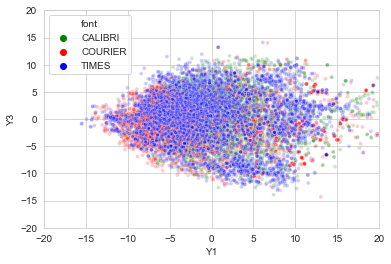

In [78]:
sns.scatterplot(x = PC123.iloc[:,0], y = PC123.iloc[:,2], hue = PC123['font'], palette = ['green', 'red', 'blue'], s = 15, alpha = .2)
plt.ylim(-20, 20)
plt.xlim(-20, 20)

(-20, 20)

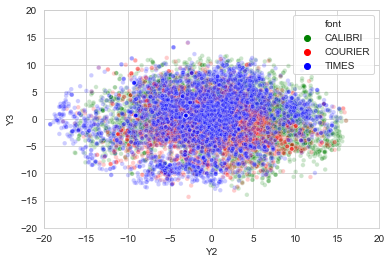

In [76]:
sns.scatterplot(x = PC123.iloc[:,1], y = PC123.iloc[:,2], hue = PC123['font'], palette = ['green', 'red', 'blue'], s = 20, alpha = .2)
plt.ylim(-20, 20)
plt.xlim(-20, 20)

In [ ]:
k = [5,10,15,20,30,40,50,100]
test_perf_k = []

In [ ]:
for i in k:
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train, y_train)
    test_perf_k.append(classifier.predict(X_test))

In [ ]:
test_perf_k2 = []
for i in test_perf_k:
    test_perf_k2.append(accuracy_score(y_true = y_test, y_pred = i))
test_perf_k2

In [ ]:
# Aesthetics
sns.set_style("whitegrid")

In [ ]:
sns.lineplot(x = k, y = test_perf_k2, color = 'blue', label = "K:[5,..100]")
plt.title('Accuracy with different # of Neighbors')
plt.xlabel('# of Neighbors')
plt.ylabel('Test Accuracy')
plt.xlim(0, 100)

In [ ]:
k_N = [5, 6, 7 , 8, 9, 10]
trainperf_N = []
testperf_N = []

for i in k_N:
    # Fitting classifier to the Training set
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train, y_train)
    # Predicting the Test set results
    y_pred_test = classifier.predict(X_test)
    # computing the % of correct classification on test set to a list & printing results
    testperf_N.append(accuracy_score(y_test, y_pred_test))
    
    y_pred_train = classifier.predict(X_train)
    trainperf_N.append(accuracy_score(y_train, y_pred_train))

In [ ]:
testperf_N

In [ ]:
testperf_N

In [ ]:
for i in range(0, len(testperf_N)):
    print(k_N[i], trainperf_N[i] - testperf_N[i])

In [ ]:
f, ax = plt.subplots(1, 1)

sns.lineplot(x = k_N, y = trainperf_N, color="blue", label="Train Performance")
sns.lineplot(x = k_N, y = testperf_N, color="red", label="Test Performance")

plt.title('Accuracy with different # of Neighbors')
plt.xlabel('# of Neighbors')
plt.ylabel('Test Accuracy')
ax.legend()
plt.savefig('Accuracy_with_K_ab.png')


plt.show()

In [ ]:
f, ax = plt.subplots(1, 1)

sns.lineplot(x = k, y = test_perf_k2, color="blue", label="K:[5,..100]")
sns.lineplot(x = k_N, y = testperf_N, color="red", label="K:[5,..,10]")

plt.title('Accuracy with different # of Neighbors')
plt.xlabel('# of Neighbors')
plt.ylabel('Test Accuracy')
plt.xlim(0, 100)
ax.legend()
plt.savefig('Accuracy_with_K_ab.png')


plt.show()

In [ ]:
testperf_df_N = pd.DataFrame({'k': k_N,
                              'test_perf': testperf_N})
testperf_df_N = testperf_df_N.sort_values(by = ['test_perf'], ascending = False)

In [ ]:
kbest = 7

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = kbest)
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [ ]:
cmtx_a_train = pd.DataFrame(
    confusion_matrix(y_true=y_train,y_pred = y_pred_train, labels = ['CALIBRI', 'COURIER', 'TIMES'], normalize = 'true'),
    index=['true:CALIBRI', 'true:COURIER', 'true:TIMES'], 
    columns=['pred:CALIBRI', 'pred:COURIER', 'pred:TIMES'])

In [ ]:
cmtx_a_train

In [ ]:
sns.heatmap(cmtx_a_train, annot=True, fmt = '.02%', annot_kws={"size": 14}, vmin = 0, vmax = 1)
plt.savefig('cmtx_train.png')

In [ ]:
N = len(y_train[y_train == 'CALIBRI'])
p_N = np.diagonal(confusion_matrix(y_true = y_train, y_pred = y_pred_train))[0] / N
sigma = math.sqrt(((p_N * (1 - p_N)) / N))
stats.norm.interval(alpha = 0.90, loc=p_N, scale=sigma)

In [ ]:
N = len(y_train[y_train == 'COURIER'])
p_N = np.diagonal(confusion_matrix(y_true = y_train, y_pred = y_pred_train))[1] / N
sigma = math.sqrt(((p_N * (1 - p_N)) / N))
stats.norm.interval(alpha = 0.90, loc=p_N, scale=sigma)

In [ ]:
N = len(y_train[y_train == 'TIMES'])
p_N = np.diagonal(confusion_matrix(y_true = y_train, y_pred = y_pred_train))[2] / N
sigma = math.sqrt(((p_N * (1 - p_N)) / N))
stats.norm.interval(alpha = 0.90, loc=p_N, scale=sigma)

In [ ]:
confusion_matrix(y_true = y_test, y_pred = y_pred_test)

In [ ]:
cmtx_a_test = pd.DataFrame(
    confusion_matrix(y_true=y_test,y_pred = y_pred_test, labels = ['CALIBRI', 'COURIER', 'TIMES'], normalize = 'true'),
    index=['true:CALIBRI', 'true:COURIER', 'true:TIMES'], 
    columns=['pred:CALIBRI', 'pred:COURIER', 'pred:TIMES'])

In [ ]:
cmtx_a_test

In [ ]:
sns.heatmap(cmtx_a_test, annot=True, fmt = '.02%', annot_kws={"size": 14}, vmin = 0, vmax = 1)
plt.savefig('cmtx_test.png')

In [ ]:
p_N = sum(np.diagonal(confusion_matrix(y_true = y_test, y_pred = y_pred_test))) / len(y_test)
N = len(y_test)
sigma = math.sqrt(((p_N * (1 - p_N)) / N))
stats.norm.interval(alpha = 0.95, loc=p_N, scale=sigma)

In [ ]:
p_N = sum(np.diagonal(confusion_matrix(y_true = y_test, y_pred = y_pred_test))) / len(y_test)
N = len(y_test)
sigma = math.sqrt(((p_N * (1 - p_N)) / N))
stats.norm.interval(alpha = 0.90, loc=p_N, scale=sigma)

In [ ]:
N = len(y_test[y_test == 'CALIBRI'])
p_N = np.diagonal(confusion_matrix(y_true = y_test, y_pred = y_pred_test))[0] / N
sigma = math.sqrt(((p_N * (1 - p_N)) / N))
stats.norm.interval(alpha = 0.90, loc=p_N, scale=sigma)

In [ ]:
N = len(y_test[y_test == 'COURIER'])
p_N = np.diagonal(confusion_matrix(y_true = y_test, y_pred = y_pred_test))[1] / N
sigma = math.sqrt(((p_N * (1 - p_N)) / N))
stats.norm.interval(alpha = 0.9, loc=p_N, scale=sigma)

In [ ]:
N = len(y_test[y_test == 'TIMES'])
p_N = np.diagonal(confusion_matrix(y_true = y_test, y_pred = y_pred_test))[2] / N
sigma = math.sqrt(((p_N * (1 - p_N)) / N))
stats.norm.interval(alpha = 0.9, loc=p_N, scale=sigma)

In [ ]:
cols = list(X_train.iloc[:,:].columns)
cols_split = np.array_split(cols, 40)
cols_split_part1 = cols_split[0:20]
cols_split_part2 = cols_split[20:40]

In [ ]:
PACK1 = np.concatenate(cols_split_part1[0::2]).tolist()
PACK2 = np.concatenate(cols_split_part1[1::2]).tolist()
PACK3 = np.concatenate(cols_split_part2[0::2]).tolist()
PACK4 = np.concatenate(cols_split_part2[1::2]).tolist()

In [ ]:
Packs = [PACK1, PACK2, PACK3, PACK4]
W = []

In [ ]:
for i in range(len(Packs)):
    # Fitting classifier to the Training set
    classifier = KNeighborsClassifier(n_neighbors = kbest)
    classifier.fit(X_train[Packs[i]], y_train)
    # Predicting the Test set results
    Y_Pred = classifier.predict(X_test[Packs[i]])
    # computing the % of correct classification on test set to a list
    W.append(accuracy_score(y_test, Y_Pred)) #performance

In [ ]:
Pack_Names = ['PACK1', 'PACK2', 'PACK3', 'PACK4']
W_dict = {'Pack': Pack_Names, 'W': W}
W_df = pd.DataFrame(W_dict)
W_df

In [ ]:
Weight_Sum_Check = (W[0]/sum(W)) + (W[1]/sum(W)) + (W[2]/sum(W)) + (W[3]/sum(W))

PACK1_Train = X_train[Packs[0]] * (W[0]/sum(W))
PACK2_Train = X_train[Packs[1]] * (W[1]/sum(W))
PACK3_Train = X_train[Packs[2]] * (W[2]/sum(W))
PACK4_Train = X_train[Packs[3]] * (W[3]/sum(W))

PACK1_Test = X_test[Packs[0]] * (W[0]/sum(W))
PACK2_Test = X_test[Packs[1]] * (W[1]/sum(W))
PACK3_Test = X_test[Packs[2]] * (W[2]/sum(W))
PACK4_Test = X_test[Packs[3]] * (W[3]/sum(W))

X_PACK_Train = pd.concat([PACK1_Train, PACK2_Train, PACK3_Train, PACK4_Train], axis=1)
X_PACK_Test = pd.concat([PACK1_Test, PACK2_Test, PACK3_Test, PACK4_Test], axis=1)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = kbest)
classifier.fit(X_PACK_Train, y_train)
# Predicting the Test set results
Y_Pred = classifier.predict(X_PACK_Test)
# Making the Confusion Matrix for Test data
Weighted_Distance_testconf = confusion_matrix(y_test, Y_Pred)
Weighted_Distance_perf = accuracy_score(y_test, Y_Pred)

In [ ]:
Weighted_Distance_perf

In [ ]:
Weighted_Distance_testconf = confusion_matrix(y_test, Y_Pred, normalize = 'true')

In [ ]:
Weighted_Distance_testconf = pd.DataFrame(
    confusion_matrix(y_true=y_test,y_pred = Y_Pred, labels = ['CALIBRI', 'COURIER', 'TIMES'], normalize = 'true'),
    index=['true:CALIBRI', 'true:COURIER', 'true:TIMES'], 
    columns=['pred:CALIBRI', 'pred:COURIER', 'pred:TIMES'])

In [ ]:
sns.heatmap(Weighted_Distance_testconf, annot=True, fmt = '.02%', annot_kws={"size": 14}, vmin = 0, vmax = 1)
plt.savefig('Weighted_Distance_testconf.png')
plt.title('Weighted Version')

In [ ]:
my_data = genfromtxt('calibri2.csv', delimiter=',')

In [ ]:
image = Image.fromarray(my_data.transpose())

In [ ]:
i = 3
j = i + 20

images = []
for z in range(0, 100):
    image_z = []
    for k in range(0,20):
        image_z.append(calibri_df.iloc[z,i:j])
        i += 20
        j += 20
    images.append(np.array(image_z))
    i = 3
    j = 23

In [ ]:
image = Image.fromarray((images[11]).astype(np.uint8))

image.convert('RGB')

In [ ]:
i = 3
j = i + 20

images = []
for z in range(0, 100):
    image_z = []
    for k in range(0,20):
        image_z.append(courier_df.iloc[z,i:j])
        i += 20
        j += 20
    images.append(np.array(image_z))
    i = 3
    j = 23

In [ ]:
image = Image.fromarray((images[11]).astype(np.uint8))

image.convert('RGB')

In [ ]:
i = 3
j = i + 20

images = []
for z in range(0, 100):
    image_z = []
    for k in range(0,20):
        image_z.append(times_df.iloc[z,i:j])
        i += 20
        j += 20
    images.append(np.array(image_z))
    i = 3
    j = 23
    
    
image = Image.fromarray((images[11]).astype(np.uint8))

image.convert('RGB')